In [ ]:
 %reset

# Dependencies and Imports

In [1]:
# Dependencies to install before use
# conda install -c conda-forge ipywidgets
# conda install -c conda-forge ipyfilechooser

# Import packages and functions
import os
import json
import ipywidgets as widgets
from IPython.display import display
from ipyfilechooser import FileChooser
from BIDS_input_backend import *
from TMSiSDK.file_readers import Poly5Reader
import numpy as np
import mne

# Subject-specific information
make sure to choose the kernel located at python.exe. Local kernel could let the output be printed twice (This has apart form the visuals no further consequences)


The variables inserted in this first widget will be used for every session-specific JSON initialized in the upcoming second widget. There is no separate JSON-file saved with only these data.

In [2]:

print("Subject-specific information")
display(
    bids_subject,
    bids_sex,
    bids_age,
    bids_handedness,
    bids_date_of_implantation,
    bids_disease_duration,
    bids_PD_subtype,
    bids_symptom_dominant_side,
    bids_LEDD,
    bids_DBS_target,
    bids_DBS_hemispheres,
    bids_DBS_model,
    bids_DBS_description,
    ECOG_present,
    output1,
)

Subject-specific information


BoundedIntText(value=0, description='Subject nr:', layout=Layout(width='800px'), max=150, style=DescriptionSty…

Dropdown(description='Sex:', layout=Layout(width='800px'), options=('n/a', 'female', 'male', 'other'), style=D…

BoundedIntText(value=0, description='Age:', layout=Layout(width='800px'), max=150, style=DescriptionStyle(desc…

RadioButtons(description='handedness', layout=Layout(width='800px'), options=('n/a', 'right', 'left'), style=D…

DatePicker(value=None, description='Date of Implantation', layout=Layout(width='800px'), style=DescriptionStyl…

BoundedIntText(value=0, description='Disease duration:', layout=Layout(width='800px'), max=150, style=Descript…

RadioButtons(description='PD subtype', layout=Layout(width='800px'), options=('n/a', 'akinetic-rigid', 'tremor…

RadioButtons(description='symptom dominant side', layout=Layout(width='800px'), options=('n/a', 'right', 'left…

BoundedIntText(value=0, description='Levodopa equivalent daily dose (LEDD):', layout=Layout(width='800px'), ma…

RadioButtons(description='DBS target', layout=Layout(width='800px'), options=('n/a', 'STN', 'GPI', 'VIM'), sty…

RadioButtons(description='DBS hemisphere', layout=Layout(width='800px'), options=('n/a', 'right', 'left', 'bil…

RadioButtons(description='DBS model', layout=Layout(width='800px'), options=('n/a', 'SenSight Short', 'SenSigh…

RadioButtons(description='DBS description', layout=Layout(width='800px'), options=('n/a', 'Medtronic: 8-contac…

Button(description='ECOG present?', layout=Layout(width='800px'), style=ButtonStyle())

Output()

# Session-specific and recording-specific information


Select Poly5-file to convert and add additional session info. After closing one session, json-file will be saved, and a window for a next session will pop up.


Files are currently saved in folder where this script is stored.

In [3]:
display(session_creation, output2)

Button(description='Create a session', layout=Layout(width='800px'), style=ButtonStyle())

Output()

In [5]:
"""
subject 
session + hardware + space + UPDRS + electrode localizations
task  + run + channel names + reference + stimsettings + time of acquisition

1 json file per recording

To Do: electrode size
"""

'\nsubject \nsession + hardware + space + UPDRS + electrode localizations\ntask  + run + channel names + reference + stimsettings + time of acquisition\n\n1 json file per recording\n\nTo Do: electrode size\n'

Reading file  C:\Users\Jonathan\Documents\DATA\PROJECT_BERLIN_Conversion\sourcedata\sub-010\ses-EcogLfpMedOff01\532LO56_MedOff1_Rest_StimOff_1 - 20220207T113556\532LO56_MedOff1_Rest_StimOff_1-20220207T113556.DATA.Poly5
	 Number of samples:  1225770 
	 Number of channels:  39 
	 Sample rate: 4000 Hz
Done reading data.
Creating RawArray with float64 data, n_channels=39, n_times=1225770
    Range : 0 ... 1225769 =      0.000 ...   306.442 secs
Ready.


<ipython-input-4-e9d36925ca87>:7: RuntimeWarning: 1 channel names are too long, have been truncated to 15 characters:
['Counter 2power24']
  info = mne.create_info(ch_names=[ch._Channel__name for ch in data.channels], sfreq=data.sample_rate, ch_types=data.num_channels*['misc'])
<ipython-input-4-e9d36925ca87>:7: RuntimeWarning: Channel names are not unique, found duplicates for: {'Z', 'Y', 'X'}. Applying running numbers for duplicates.
  info = mne.create_info(ch_names=[ch._Channel__name for ch in data.channels], sfreq=data.sample_rate, ch_types=data.num_channels*['misc'])


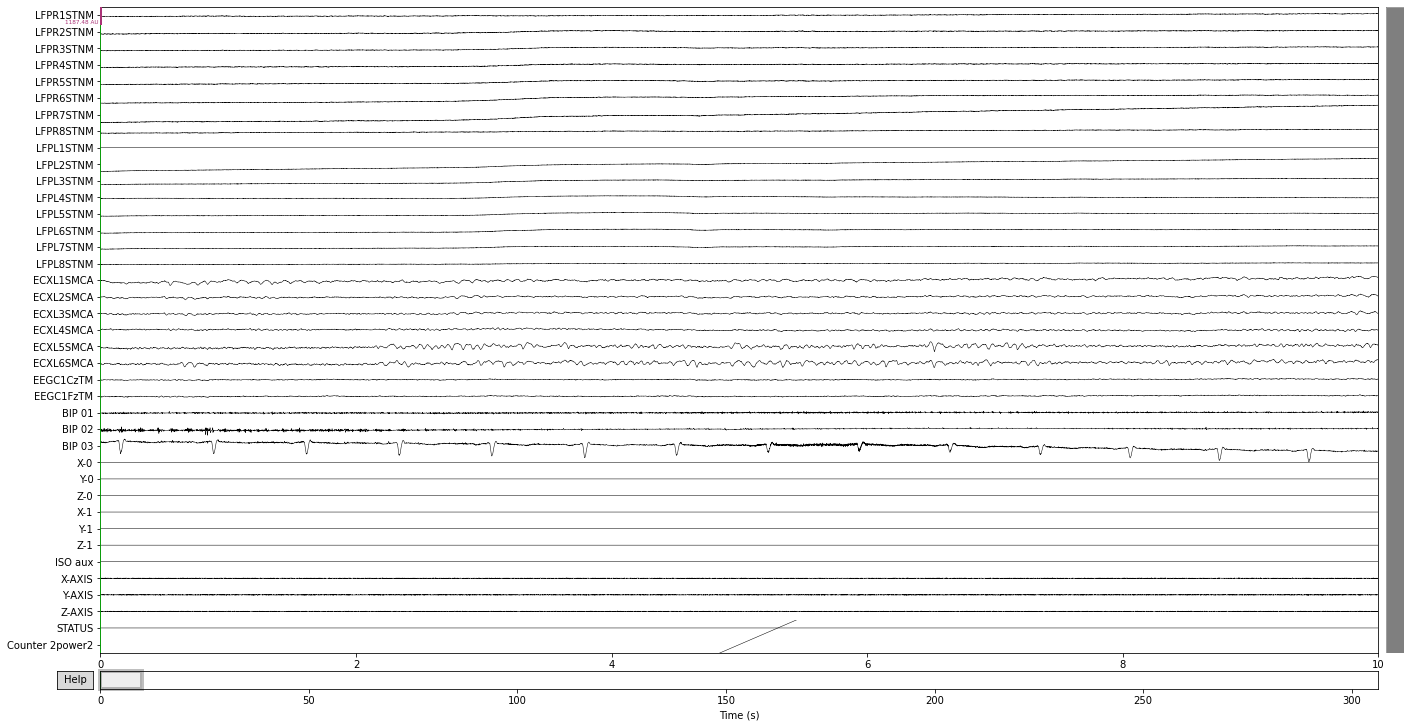

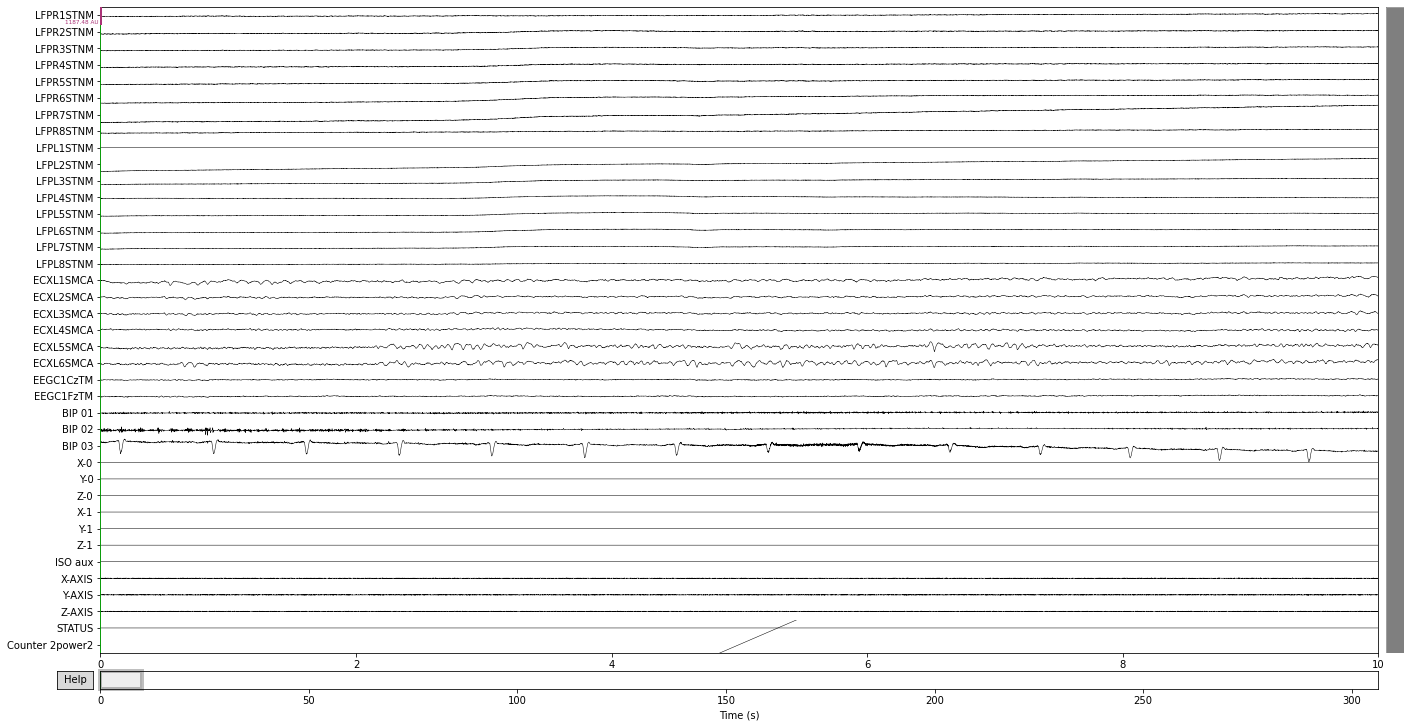

In [4]:
#from matplotlib import pyplot as plt
file = r"C:\Users\Jonathan\Documents\DATA\PROJECT_BERLIN_Conversion\sourcedata\sub-010\ses-EcogLfpMedOff01\532LO56_MedOff1_Rest_StimOff_1 - 20220207T113556\532LO56_MedOff1_Rest_StimOff_1-20220207T113556.DATA.Poly5"
data = Poly5Reader(file)

dataraw = np.array(data.samples)

info = mne.create_info(ch_names=[ch._Channel__name for ch in data.channels], sfreq=data.sample_rate, ch_types=data.num_channels*['misc'])

raw = mne.io.RawArray(data.samples, info)

#matplotlib qt5Agg
#matplotlib.use('Qt5Agg')
#%matplotlib qt
raw.plot(show=True, block=True, n_channels=raw.info['nchan'])

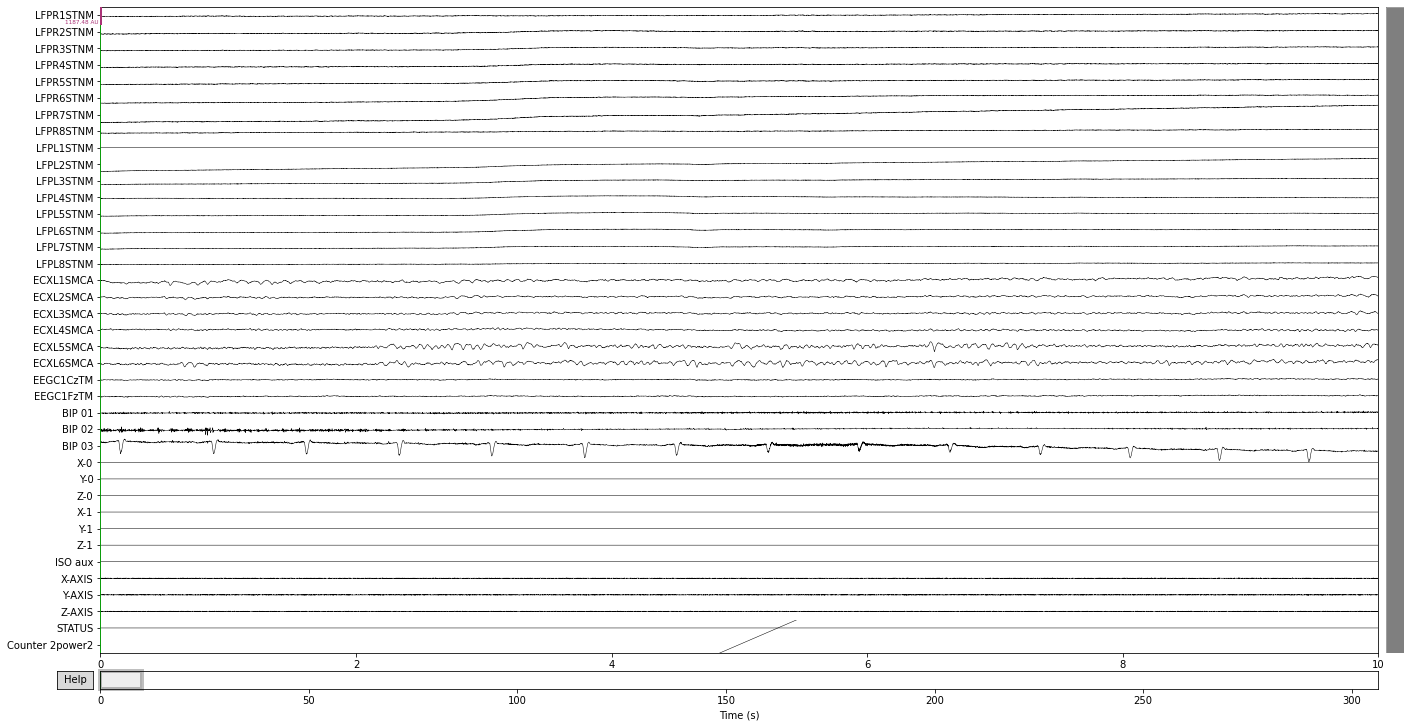

Text(value='LFP_R_1_STN_MT', description='LFPR1STNM', layout=Layout(width='800px'), placeholder='***deleted***…

Text(value='LFP_R_2_STN_MT', description='LFPR2STNM', layout=Layout(width='800px'), placeholder='***deleted***…

Text(value='LFP_R_3_STN_MT', description='LFPR3STNM', layout=Layout(width='800px'), placeholder='***deleted***…

Text(value='LFP_R_4_STN_MT', description='LFPR4STNM', layout=Layout(width='800px'), placeholder='***deleted***…

Text(value='LFP_R_5_STN_MT', description='LFPR5STNM', layout=Layout(width='800px'), placeholder='***deleted***…

Text(value='LFP_R_6_STN_MT', description='LFPR6STNM', layout=Layout(width='800px'), placeholder='***deleted***…

Text(value='LFP_R_7_STN_MT', description='LFPR7STNM', layout=Layout(width='800px'), placeholder='***deleted***…

Text(value='LFP_R_8_STN_MT', description='LFPR8STNM', layout=Layout(width='800px'), placeholder='***deleted***…

Text(value='LFP_L_1_STN_MT', description='LFPL1STNM', layout=Layout(width='800px'), placeholder='***deleted***…

Text(value='LFP_L_2_STN_MT', description='LFPL2STNM', layout=Layout(width='800px'), placeholder='***deleted***…

Text(value='LFP_L_3_STN_MT', description='LFPL3STNM', layout=Layout(width='800px'), placeholder='***deleted***…

Text(value='LFP_L_4_STN_MT', description='LFPL4STNM', layout=Layout(width='800px'), placeholder='***deleted***…

Text(value='LFP_L_5_STN_MT', description='LFPL5STNM', layout=Layout(width='800px'), placeholder='***deleted***…

Text(value='LFP_L_6_STN_MT', description='LFPL6STNM', layout=Layout(width='800px'), placeholder='***deleted***…

Text(value='LFP_L_7_STN_MT', description='LFPL7STNM', layout=Layout(width='800px'), placeholder='***deleted***…

Text(value='LFP_L_8_STN_MT', description='LFPL8STNM', layout=Layout(width='800px'), placeholder='***deleted***…

Text(value='ECOG_L_1_SMC_AT', description='ECXL1SMCA', layout=Layout(width='800px'), placeholder='***deleted**…

Text(value='ECOG_L_2_SMC_AT', description='ECXL2SMCA', layout=Layout(width='800px'), placeholder='***deleted**…

Text(value='ECOG_L_3_SMC_AT', description='ECXL3SMCA', layout=Layout(width='800px'), placeholder='***deleted**…

Text(value='ECOG_L_4_SMC_AT', description='ECXL4SMCA', layout=Layout(width='800px'), placeholder='***deleted**…

Text(value='ECOG_L_5_SMC_AT', description='ECXL5SMCA', layout=Layout(width='800px'), placeholder='***deleted**…

Text(value='ECOG_L_6_SMC_AT', description='ECXL6SMCA', layout=Layout(width='800px'), placeholder='***deleted**…

Text(value='EEG_CZ_TM', description='EEGC1CzTM', layout=Layout(width='800px'), placeholder='***deleted***', st…

Text(value='EEG_CZ_TM', description='EEGC1FzTM', layout=Layout(width='800px'), placeholder='***deleted***', st…

Text(value='EMG_R_BR_TM', description='BIP 01', layout=Layout(width='800px'), placeholder='***deleted***', sty…

Text(value='EMG_L_BR_TM', description='BIP 02', layout=Layout(width='800px'), placeholder='***deleted***', sty…

Text(value='ECG', description='BIP 03', layout=Layout(width='800px'), placeholder='***deleted***', style=Descr…

Text(value='ACC_R_X_D2_TM', description='X-0', layout=Layout(width='800px'), placeholder='***deleted***', styl…

Text(value='ACC_R_Y_D2_TM', description='Y-0', layout=Layout(width='800px'), placeholder='***deleted***', styl…

Text(value='ACC_R_Z_D2_TM', description='Z-0', layout=Layout(width='800px'), placeholder='***deleted***', styl…

Text(value='ACC_L_X_D2_TM', description='X-1', layout=Layout(width='800px'), placeholder='***deleted***', styl…

Text(value='ACC_L_Y_D2_TM', description='Y-1', layout=Layout(width='800px'), placeholder='***deleted***', styl…

Text(value='ACC_L_Z_D2_TM', description='Z-1', layout=Layout(width='800px'), placeholder='***deleted***', styl…

Text(value='ANALOG_R_ROTA_CH', description='ISO aux', layout=Layout(width='800px'), placeholder='***deleted***…

Text(value='', description='X-AXIS', layout=Layout(width='800px'), placeholder='***deleted***', style=Descript…

Text(value='', description='Y-AXIS', layout=Layout(width='800px'), placeholder='***deleted***', style=Descript…

Text(value='', description='Z-AXIS', layout=Layout(width='800px'), placeholder='***deleted***', style=Descript…

Text(value='', description='STATUS', layout=Layout(width='800px'), placeholder='***deleted***', style=Descript…

Text(value='', description='Counter 2power2', layout=Layout(width='800px'), placeholder='***deleted***', style…

Button(description='Save this meta data to json and go to next recording', layout=Layout(width='800px'), style…

In [29]:
# data = Poly5Reader(bids_filechooser[-1].selected_path + os.sep + bids_filechooser[-1].selected_filename)

# info = mne.create_info(ch_names=[ch._Channel__name for ch in data.channels], sfreq=data.sample_rate, ch_types=data.num_channels * ['misc'])

# raw = mne.io.RawArray(data.samples, info)

bids_channel_names = []

for ch in raw.ch_names:
    if ch.startswith('LFP'):
        preset = 'LFP_' + ch[3] + '_' + ch[4] + '_' + ch[5:8] + '_'
        if ch.endswith('B'):
            preset+='BS'
        elif ch.endswith('M'):
            preset+='MT'
    elif ch.startswith('ECX'):
        preset = 'ECOG_' + ch[3] + '_' + ch[4] + '_' + ch[5:8] + '_'
        if ch.endswith('B'):
            preset+='BS'
        elif ch.endswith('M'):
            preset+='MT'
        elif ch.endswith('A'):
            preset+='AT'
    elif ch.startswith('EEG'):
        preset = 'EEG_'
        if ch.upper().find('CZ'):
             preset += 'CZ_'
        elif ch.upper().find('FZ'):
            preset += 'FZ_'
        if ch.upper().find('TM'):
            preset += 'TM'
    elif ch.startswith('BIP 01'):
        preset = 'EMG_R_BR_TM'
    elif ch.startswith('BIP 02'):
        preset = 'EMG_L_BR_TM'
    elif ch.startswith('BIP 03'):
        preset = 'ECG'
    elif ch.startswith('X-0'):
        preset = 'ACC_R_X_D2_TM'
    elif ch.startswith('Y-0'):
        preset = 'ACC_R_Y_D2_TM'
    elif ch.startswith('Z-0'):
        preset = 'ACC_R_Z_D2_TM'
    elif ch.startswith('X-1'):
        preset = 'ACC_L_X_D2_TM'
    elif ch.startswith('Y-1'):
        preset = 'ACC_L_Y_D2_TM'
    elif ch.startswith('Z-1'):
        preset = 'ACC_L_Z_D2_TM'
    elif ch.startswith('ISO aux'):
        preset = 'ANALOG_R_ROTA_CH'
    else:
        preset = None


    channel_widget = widgets.Text(
        value=preset,
        placeholder='***deleted***',
        description=ch,
        style=style,
        layout=layout
    )
    bids_channel_names.append(channel_widget)


raw.plot(show=True, block=True, n_channels=raw.info['nchan'], title=bids_filechooser[-1].selected_filename)
for widget in bids_channel_names:
    display(widget)
display(save_to_json)

bids_channel_names[-1].value

In [31]:
bids_channel_names[-1].value
bids_channel_names[-1].description

'Counter 2power2'

In [9]:
raw.ch_names

['LFPR1STNM',
 'LFPR2STNM',
 'LFPR3STNM',
 'LFPR4STNM',
 'LFPR5STNM',
 'LFPR6STNM',
 'LFPR7STNM',
 'LFPR8STNM',
 'LFPL1STNM',
 'LFPL2STNM',
 'LFPL3STNM',
 'LFPL4STNM',
 'LFPL5STNM',
 'LFPL6STNM',
 'LFPL7STNM',
 'LFPL8STNM',
 'ECXL1SMCA',
 'ECXL2SMCA',
 'ECXL3SMCA',
 'ECXL4SMCA',
 'ECXL5SMCA',
 'ECXL6SMCA',
 'EEGC1CzTM',
 'EEGC1FzTM',
 'BIP 01',
 'BIP 02',
 'BIP 03',
 'X-0',
 'Y-0',
 'Z-0',
 'X-1',
 'Y-1',
 'Z-1',
 'ISO aux',
 'X-AXIS',
 'Y-AXIS',
 'Z-AXIS',
 'STATUS',
 'Counter 2power2']

In [1]:
#raw.plot(show_options=True, duration=10, title=None, scalings="auto", decim='auto')
import mne
raw.plot( scalings="auto", decim='auto')

NameError: name 'raw' is not defined

In [ ]:
inputdata_location = str()
inputdata_fname = str()
entities = {}
entities['task'] = str()
bidsdict = {}
bidsdict['entities'] = {}
bidsdict['entities']['task'] = 'task'

In [ ]:
f=bids_filechooser[-1]
print(os.sep)